# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [1053]:
import math

#Computes polar angles between two points
#If only one point is provided then calculates
#polar angle between the point and lowest leftmost point
def polarAngle(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return math.atan2(dy, dx)

#Calculates distance between two points
#If only one point is provided then calculates
#distance between the point and lowest leftmost point
def distance(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return dy ** 2 + dx ** 2

#2D determinent of three points
#Determinant > 0 -> points represent anti-clockwise turn
#Determinant < 0 -> points represent clockwise turn
#Determinant = 0 -> points are co-linear
def determinant(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def swap(arr, i, j):       
    arr[i], arr[j] = arr[j], arr[i] 
    return arr

def partition(arr,l,h):
    i = l - 1
    x = arr[h]
    for j in range(l,h):
        #here, the algorithm makes a comparison between polar angles
        if polarAngle(arr[j]) <= polarAngle(x):
            i += 1
            arr = swap(arr,i,j)
    arr = swap(arr,i+1,h)
    return i + 1

#iterative quick sort has been used to sort the points based on polar angle
def quickSort(arr,l,h):
    sortedPoints = []
    sortedPoints.append(l)
    sortedPoints.append(h)
 
    while len(sortedPoints) > 0:
 
        h = sortedPoints.pop()
        l = sortedPoints.pop()
        p = partition(arr,l,h)
         
        #when there are elements on the left of the pivot
        if p-1 > l:
            #then it should append the elements on the left first
            sortedPoints.append(l)
            sortedPoints.append(p-1)
            
        #when there are elements on the right of the pivot
        if p+1 < h:
            sortedPoints.append(p+1)
            sortedPoints.append(h)

#finds the bottom left point
def LowestLeftMost(inputSet):
    MIN = 0
    for i in range(0, len(inputSet)):
        #first finds the lowest point in the input set
        if inputSet[i][1] < inputSet[MIN][1]:
            MIN = i
        # when two points have the same y coordinate
        #we must compare x coordinates and the one with the lowest x coordinate is the minimum point
        if inputSet[i][1] == inputSet[MIN][1]:
            if inputSet[i][0] < inputSet[MIN][0]:
                MIN = i     
    return inputSet[MIN]

def grahamscan(inputSet):
    #Lowest leftmost point
    global llmPoint
    llmPoint = LowestLeftMost(inputSet)
    #sort the inputSet
    quickSort(inputSet,0,len(inputSet)-1)
    sortedPoints = inputSet
    #the hull must have the lowest leftmost point,
    #sortedPoints[0] is used to make an initial comparison later on
    outputSet = [llmPoint, sortedPoints[0]]
    for s in sortedPoints[1:]:
        #when the orientation is clockwise or the points are co-linear
        #it should pop the last item added from the stack
        while determinant(outputSet[-2], outputSet[-1], s) <= 0:
            outputSet.pop()
            if len(outputSet) < 2: #Check to make sure llm point is not deleted
                break
        outputSet.append(s)
    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [1054]:
import random
#code for random data generation
def generateRandomInputSet(N):
    inputSet = []
    for i in range(0, N):
        x = random.randint(0, 32767)
        y = random.randint(0, 32767)
        inputSet.append([x, y])
    return inputSet

#code for worst case data generation
def generateWorstCaseInputSet(N):
    inputSet = []
    for i in range(0, N):
        x = random.randint(0, 32767)
        y = random.randint(0, 32767)
        inputSet.append([x, y])
    global llmPoint
    llmPoint = LowestLeftMost(inputSet)
    return(sorted(inputSet, key = polarAngle))

Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [1055]:
import timeit

def testGivenPoints(numbersToTest, nof_repeats):
    print("No. of points", "\t Time taken \t\t\t Points on hull")
    for numberToTest in numbersToTest:
        sum_all_times = 0
        sum_outputset_size = 0
        for i in range(0,nof_repeats):
            inputSet = generateRandomInputSet(numberToTest)
            #inputSet = generateWorstCaseInputSet(numberToTest)
            start_time = timeit.default_timer()
            outputSet = grahamscan(inputSet)
            end_time = timeit.default_timer()
            sum_all_times += end_time - start_time
            sum_outputset_size += len(outputSet)
        sum_all_times = sum_all_times / nof_repeats
        sum_outputset_size = sum_outputset_size / nof_repeats
        print(numberToTest, "      \t", sum_all_times, "     \t", sum_outputset_size)

#Main code to run tests for each given number of points
NOF_REPEATS = 3
numbersToTest = [100,200,500,1000,2000,5000,10000,15000,20000]
testGivenPoints(numbersToTest, NOF_REPEATS)

No. of points 	 Time taken 			 Points on hull
100       	 0.005377988331019878      	 11.666666666666666
200       	 0.00418754566150407      	 12.666666666666666
500       	 0.009334487670760913      	 14.333333333333334
1000       	 0.02134720099760064      	 19.666666666666668
2000       	 0.05502805133194973      	 20.0
5000       	 0.14765302433321872      	 23.0
10000       	 0.28747041399765294      	 23.0
15000       	 0.524628503000713      	 26.333333333333332
20000       	 0.7238121929985937      	 24.666666666666668


In [1056]:
inputSet = generateRandomInputSet(100)
#inputSet = generateWorstCaseInputSet(100)
outputSet = grahamscan(inputSet)

*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

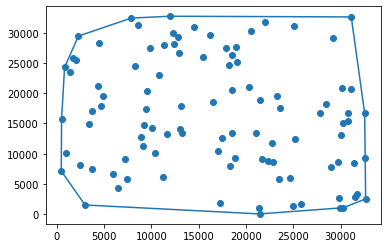

In [1057]:
import matplotlib.pyplot as plt
# inputSet and outputSet should have been defined above. 
plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 
plt.show() 